# Covid_19 world data from December 2019 to December 2020.

Obtained from https://www.kaggle.com/datasets/hgultekin/covid19-coronavirus-dataset

official data provider: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
"""File was renamed to 'COVID_19_2020_worldwide2.csv' and loaded using Pandas"""

covid_2020=pd.read_csv('COVID_19_2020_worldwide2.csv')
covid_2020.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,08/08/2020,8,8,2020,78,9,Afghanistan,AF,AFG,38041757.0,Asia,2.573488
1,07/08/2020,7,8,2020,41,0,Afghanistan,AF,AFG,38041757.0,Asia,2.652349
2,06/08/2020,6,8,2020,67,4,Afghanistan,AF,AFG,38041757.0,Asia,2.578745
3,05/08/2020,5,8,2020,82,6,Afghanistan,AF,AFG,38041757.0,Asia,2.896817
4,04/08/2020,4,8,2020,37,4,Afghanistan,AF,AFG,38041757.0,Asia,2.975677


In [3]:
"""number of countries with records in the dataset """
covid_2020['countriesAndTerritories'].nunique()

210

In [4]:
"""Since the countries are too many to view at a time, we check the total sum of cases, deaths and population by continent """
agg_by_continent = covid_2020.groupby('continentExp')[['cases','deaths','popData2019']].sum()

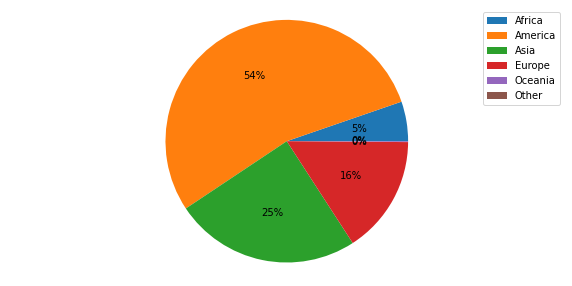

In [5]:
"""percentage Sum of cases by continent"""

labels=agg_by_continent.index
plt.figure(figsize=(10,5))
plt.pie( agg_by_continent['cases'], autopct='%.0f%%')
plt.legend(labels, loc='best')
plt.axis('equal')
plt.show()

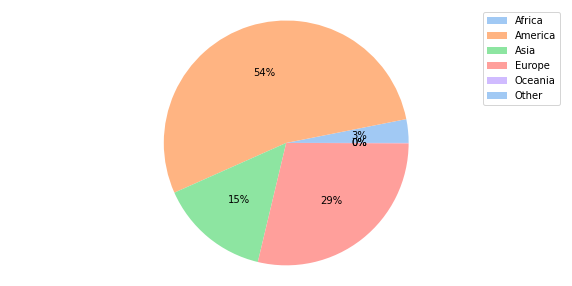

In [6]:
"""percentage Sum of deaths by continent"""

colors = sns.color_palette('pastel')[0:5]
labels=agg_by_continent.index
plt.figure(figsize=(10,5))
plt.pie( agg_by_continent['deaths'], autopct='%.0f%%', colors=colors)
plt.legend(labels, loc='best')
plt.axis('equal')
plt.show()

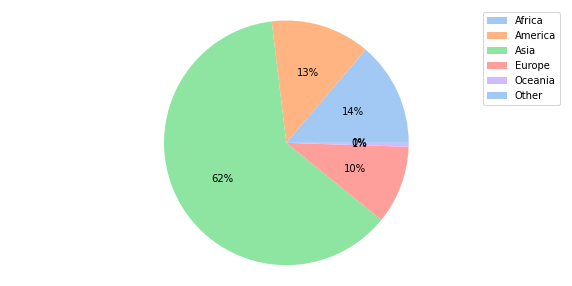

In [7]:
"""population by continent"""

colors = sns.color_palette('pastel')[0:5]
labels=agg_by_continent.index
plt.figure(figsize=(10,5))
plt.pie( agg_by_continent['popData2019'], autopct='%.0f%%', colors=colors)
plt.legend(labels, loc='best')
plt.axis('equal')
plt.show()

Exploring data specifically for Europe

In [8]:
"""The data was filtered where continent name was Europe.
The dates of each record was added, the numeber of cases and deaths in each date as well as the population of the country was
added to the dataframe"""

covid_europe_2020 = covid_2020[covid_2020['continentExp']=='Europe'][['dateRep',
                                                                      'cases',
                                                                      'deaths','popData2019',
                                                                      'countriesAndTerritories']]
covid_europe_2020['countriesAndTerritories'].unique()

array(['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia_and_Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Faroe_Islands', 'Finland', 'France', 'Georgia', 'Germany',
       'Gibraltar', 'Greece', 'Guernsey', 'Holy_See', 'Hungary',
       'Iceland', 'Ireland', 'Isle_of_Man', 'Italy', 'Jersey', 'Kosovo',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
       'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
       'North_Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Russia', 'San_Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Ukraine', 'United_Kingdom'], dtype=object)

In [9]:
"""Grouping the europe data by country, we aggregate the total sum of cases, deaths and population for each country"""

data=covid_europe_2020.groupby([covid_europe_2020['countriesAndTerritories']]).agg(
    {'cases':'sum', 'deaths':'sum', 'popData2019':'sum'})

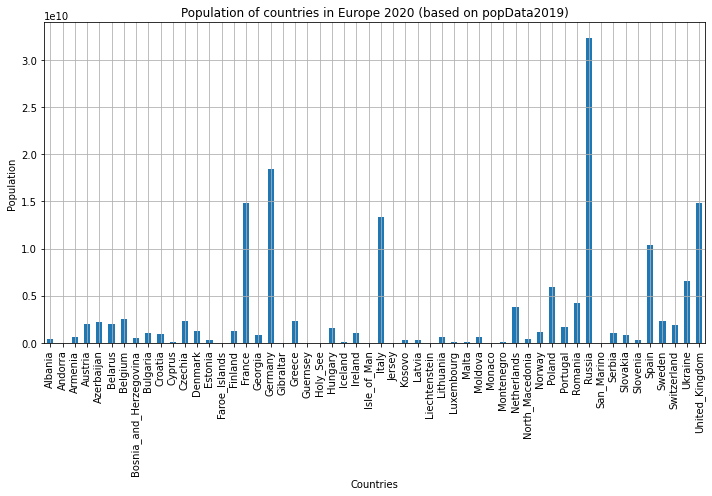

In [10]:
"""The plot shows that Russia, Germany, France, United Kingdom, Italy and Spain respectively have the 
the highest population in Europe, we would consider the trends of the pandemic in these countries"""

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
data['popData2019'].plot.bar()
plt.grid()
plt.title('Population of countries in Europe 2020 (based on popData2019)')
plt.ylabel('Population')
plt.xlabel('Countries')
plt.show()

In [15]:
"""Lets now compare the trends in cases and deaths for UK, Russia, Spain, Italy, France and Germany """

'Lets now compare the trends in cases and deaths for UK, Russia, Spain, Italy, France and Germany '

In [51]:
conditions =[(covid_2020['countriesAndTerritories']=='United_Kingdom'),
            (covid_2020['countriesAndTerritories']=='Russia'),
            (covid_2020['countriesAndTerritories']=='Spain'),
            (covid_2020['countriesAndTerritories']=='Italy'),
            (covid_2020['countriesAndTerritories']=='France'),
            (covid_2020['countriesAndTerritories']=='Germany')]
choices = [1,2,3,4,5,6]

covid_2020['countries'] =np.select(conditions, choices)
countries =covid_2020.drop(covid_2020['countries'].index[covid_2020['countries']==0])
countries['countriesAndTerritories'].unique()

array(['France', 'Germany', 'Italy', 'Russia', 'Spain', 'United_Kingdom'],
      dtype=object)

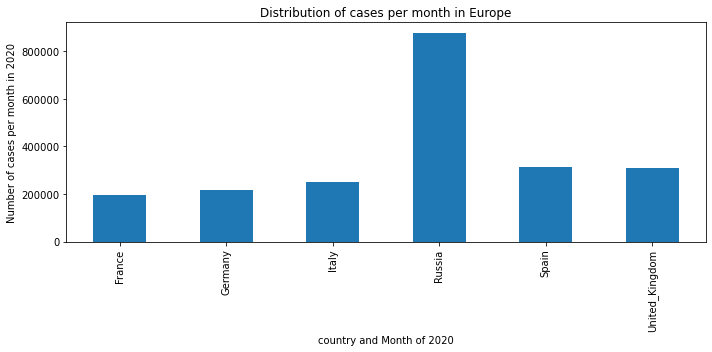

In [52]:
"""Plot of cases and deaths months on months for UK

The UK recorded about 90 thousand plus cases in 2020 deaths in all the months of 2020 with the highest cases records in April and May"""

countries['dateRep']=pd.to_datetime(countries['dateRep'])
plt.figure()
cases_and_deaths = countries.groupby([countries['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['cases'].plot.bar()
plt.title('Distribution of cases per month in Europe')
plt.ylabel('Number of cases per month in 2020')
plt.xlabel('country and Month of 2020')
plt.show()

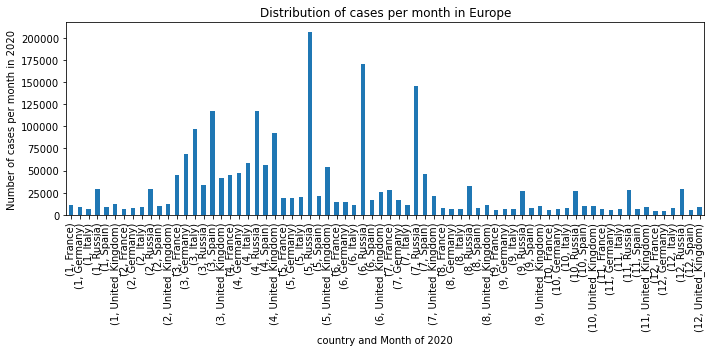

In [53]:
"""Plot of cases and deaths months on months for UK

The UK recorded about 90 thousand plus cases in 2020 deaths in all the months of 2020 with the highest cases records in April and May"""

countries['dateRep']=pd.to_datetime(countries['dateRep'])
plt.figure()
cases_and_deaths = countries.groupby([countries['dateRep'].dt.month,
                                      countries['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['cases'].plot.bar()
plt.title('Distribution of cases per month in Europe')
plt.ylabel('Number of cases per month in 2020')
plt.xlabel('country and Month of 2020')
plt.show()

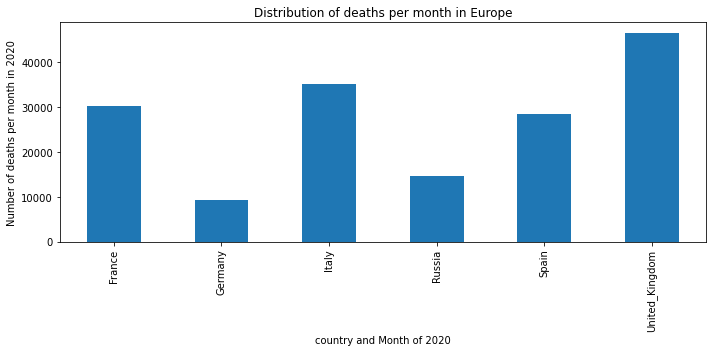

In [54]:
countries['dateRep']=pd.to_datetime(countries['dateRep'])
plt.figure()
cases_and_deaths = countries.groupby([countries['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['deaths'].plot.bar()
plt.title('Distribution of deaths per month in Europe')
plt.ylabel('Number of deaths per month in 2020')
plt.xlabel('country and Month of 2020')
plt.show()

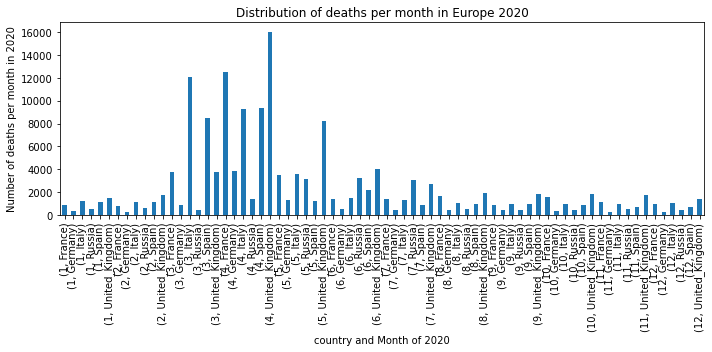

In [58]:
countries['dateRep']=pd.to_datetime(countries['dateRep'])
plt.figure()
cases_and_deaths = countries.groupby([countries['dateRep'].dt.month,
                                      countries['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['deaths'].plot.bar()
plt.title('Distribution of deaths per month in Europe 2020')
plt.ylabel('Number of deaths per month in 2020')
plt.xlabel('country and Month of 2020')
plt.show()

In [59]:
UK = countries[countries['countriesAndTerritories']=='United_Kingdom']
Russia = countries[countries['countriesAndTerritories']=='Russia']
France = countries[countries['countriesAndTerritories']=='France']
Germany = countries[countries['countriesAndTerritories']=='Germany']
Spain = countries[countries['countriesAndTerritories']=='Spain']
Italy = countries[countries['countriesAndTerritories']=='Italy']

In [69]:
UK['Uk_active']=(UK['cases']-UK['deaths'])
UK_active_20 = UK.groupby([UK['month']])['Uk_active'].sum()

Russia['Russia_active']=(Russia['cases']-Russia['deaths'])
Russia_active_20 = Russia.groupby([Russia['month']])['Russia_active'].sum()


France['France_active']=(France['cases']-France['deaths'])
France_active_20 = France.groupby([France['month']])['France_active'].sum()


Germany['Germany_active']=(Germany['cases']-Germany['deaths'])
Germany_active_20 = Germany.groupby([Germany['month']])['Germany_active'].sum()


Spain['Spain_active']=(Spain['cases']-Spain['deaths'])
Spain_active_20 = Spain.groupby([Spain['month']])['Spain_active'].sum()


Italy['Italy_active']=(Italy['cases']-Italy['deaths'])
Italy_active_20 = Italy.groupby([Italy['month']])['Italy_active'].sum()

<ipython-input-69-46822aee79ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK['Uk_active']=(UK['cases']-UK['deaths'])
<ipython-input-69-46822aee79ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Russia['Russia_active']=(Russia['cases']-Russia['deaths'])
<ipython-input-69-46822aee79ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

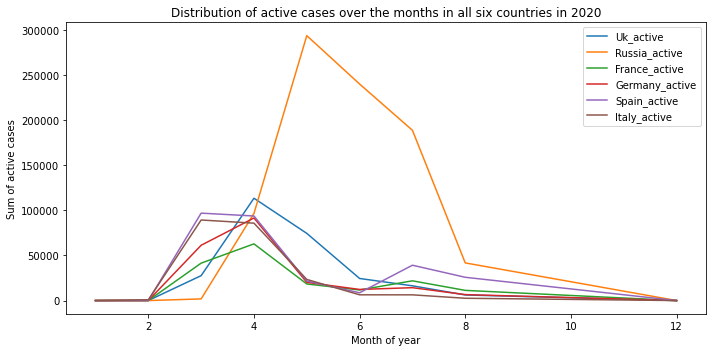

In [70]:
plt.figure()
UK_active_20.plot()
Russia_active_20.plot()
France_active_20.plot()
Germany_active_20.plot()
Spain_active_20.plot()
Italy_active_20.plot()
plt.title('Distribution of active cases over the months in all six countries in 2020')
plt.ylabel('Sum of active cases')
plt.xlabel('Month of year')
plt.legend()
plt.show()

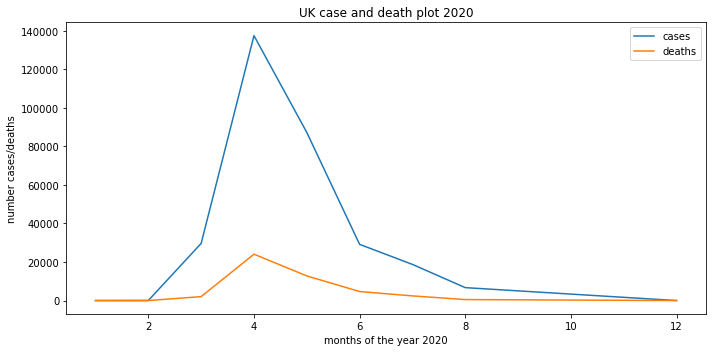

In [94]:
plt.figure()
UK.groupby([UK['month']])['cases'].sum().plot()
UK.groupby([UK['month']])['deaths'].sum().plot()
plt.title('UK case and death plot 2020')
plt.ylabel('number cases/deaths')
plt.xlabel('months of the year 2020')
plt.legend()
plt.show()

Comparing the data from these six countries, although each country recorded different number of cases and deaths,
there seems to be pattern in the number of active cases over the period covered. This may possibly be due to the lockedown which followed 
the same pattern accross countries in Europe

# Covid_19 world data from 2021.

- from a dataset containing only EU covid data : https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country
- The above dataset doesn't contain UK data as only for EU countries, therefore merging UK cases and deaths from dataset at https://coronavirus.data.gov.uk/
    - Downloaded table containing the below metrics 
    - 'newDailyNsoDeathsByDeathDate' for the measure of daily deaths, 
    - 'newPillarFourTestsByPublishDate' for the measure of daily cases
        - this metric is defined as "Daily numbers of new confirmed positive, negative or void COVID-19 tests conducted under pillar 4 (COVID-19 testing for national surveillance). Data are shown by the date the figures appeared in published totals."
 
- According to Office for National Statistics data, Mid-2020 UK population was 67,081,234 so fill this into the merged table : https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland

In [28]:
""" EU covid dataset"""

covid_eu=pd.read_csv('EU_covid_data.csv')
UK_data=pd.read_csv('UK_COVID_data.csv')
covid_eu_2021 = covid_eu[covid_eu['year'] == 2021]

In [29]:
UK_data['date'] = pd.to_datetime(UK_data['date'], errors='coerce')
UK_data['day'] = UK_data['date'].dt.day
UK_data['month'] = UK_data['date'].dt.month
UK_data['year'] = UK_data['date'].dt.year
UK_data. rename(columns = {'areaName':'countriesAndTerritories', 
                           'newDailyNsoDeathsByDeathDate':'deaths', 
                           'newPillarFourTestsByPublishDate':'cases'}, inplace = True)
UK_2021_data = UK_data.loc[UK_data['year'] == 2021]
merged_2021_df = pd.merge(covid_eu_2021, UK_2021_data, on=['countriesAndTerritories', 'deaths', 'cases','day', 'month', 'year'],how='outer')

In [30]:
"""Adding the Uk population"""
merged_2021_df.loc[merged_2021_df['countriesAndTerritories'] == 'United Kingdom', 'popData2020'] = 67081234

In [31]:
covid_2021=merged_2021_df.copy()

In [32]:
conditions =[(covid_2021['countriesAndTerritories']=='United Kingdom'),
            (covid_2021['countriesAndTerritories']=='Spain'),
            (covid_2021['countriesAndTerritories']=='Italy'),
            (covid_2021['countriesAndTerritories']=='France'),
            (covid_2021['countriesAndTerritories']=='Germany')]
choices = [1,2,3,4,5]

covid_2021['countries'] =np.select(conditions, choices)
countries_21 =covid_2021.drop(covid_2021['countries'].index[covid_2021['countries']==0])
countries_21['countriesAndTerritories'].unique()

array(['France', 'Germany', 'Italy', 'Spain', 'United Kingdom'],
      dtype=object)

In [33]:
countries_21.head(1)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp,areaCode,areaType,date,countries
3285,31/12/2021,31,12,2021,232200.0,189.0,France,FR,FRA,67320216.0,Europe,NaN,NaN,NaT,4


Analysis of 2021 data!!

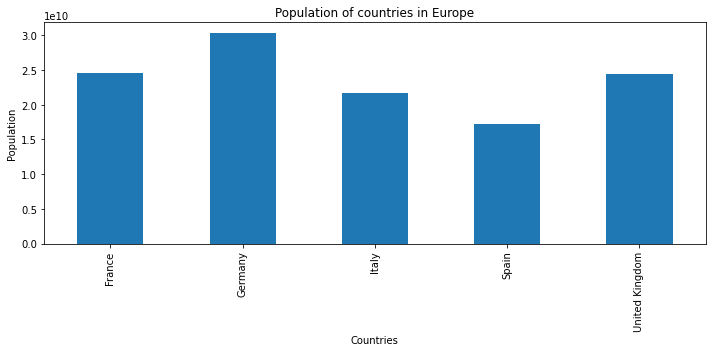

In [34]:
"""The plot shows that Russia, Germany, France, United Kingdom, Italy and Spain respectively have the 
the highest population in Europe, we would consider the trends of the pandemic in these countries"""

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
countries_21.groupby('countriesAndTerritories')['popData2020'].sum().plot.bar()
plt.title('Population of countries in Europe')
plt.ylabel('Population')
plt.xlabel('Countries')
plt.show()

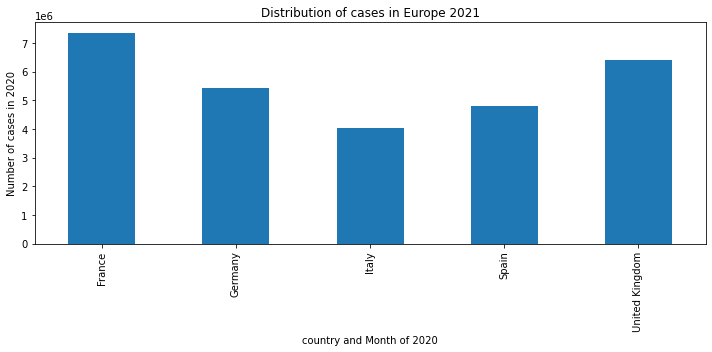

In [35]:
"""Total cases by country in 2021"""
countries_21['dateRep']=pd.to_datetime(countries_21['dateRep'])
plt.figure()
cases_and_deaths_21 = countries_21.groupby([countries_21['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths_21['cases'].plot.bar()
plt.title('Distribution of cases in Europe 2021')
plt.ylabel('Number of cases in 2020')
plt.xlabel('country and Month of 2020')
plt.show()

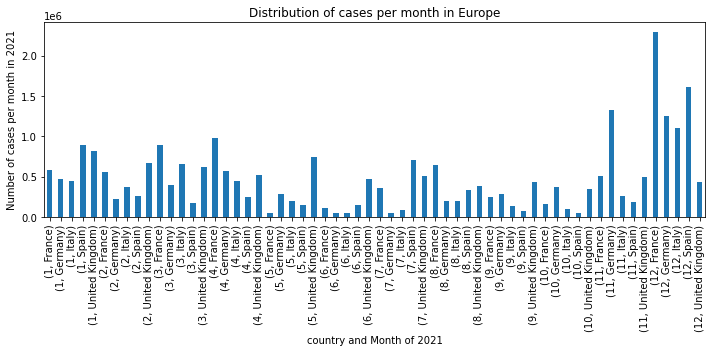

In [36]:
"""Plot of cases months on months for UK"""

countries_21['dateRep']=pd.to_datetime(countries_21['dateRep'])
plt.figure()
cases_and_deaths = countries_21.groupby([countries_21['month'],
                                      countries_21['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['cases'].plot.bar()
plt.title('Distribution of cases per month in Europe')
plt.ylabel('Number of cases per month in 2021')
plt.xlabel('country and Month of 2021')
plt.show()

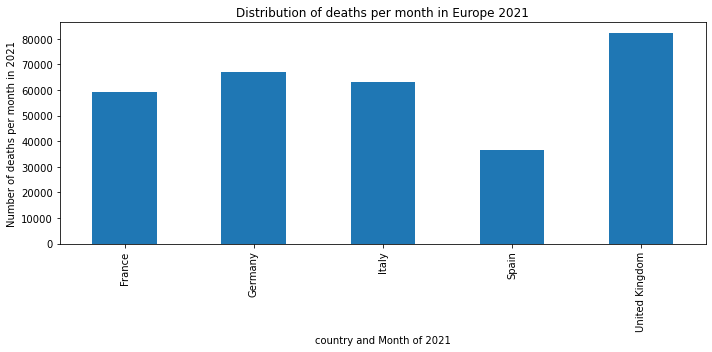

In [37]:
"""Deaths in Europe 2021"""
plt.figure()
cases_and_deaths = countries_21.groupby([countries_21['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['deaths'].plot.bar()
plt.title('Distribution of deaths per month in Europe 2021')
plt.ylabel('Number of deaths per month in 2021')
plt.xlabel('country and Month of 2021')
plt.show()

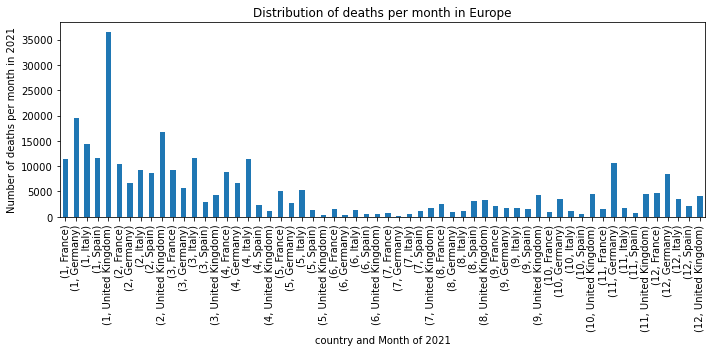

In [80]:
"""Deaths Month on month in Europe 2021"""
plt.figure()
cases_and_deaths = countries_21.groupby([countries_21['month'],
                                      countries_21['countriesAndTerritories']]
                                    ).agg({'cases':'sum', 'deaths':'sum'})
cases_and_deaths['deaths'].plot.bar()
plt.title('Distribution of deaths per month in Europe')
plt.ylabel('Number of deaths per month in 2021')
plt.xlabel('country and Month of 2021')
plt.show()

In [71]:
"""Plotting the trend in the active cases for accross the months for all countries"""

'Plotting the trend in the active cases for accross the months for all countries'

In [39]:
UK_21 = countries_21[countries_21['countriesAndTerritories']=='United Kingdom']
France_21 = countries_21[countries_21['countriesAndTerritories']=='France']
Germany_21 = countries_21[countries_21['countriesAndTerritories']=='Germany']
Spain_21 = countries_21[countries_21['countriesAndTerritories']=='Spain']
Italy_21 = countries_21[countries_21['countriesAndTerritories']=='Italy']

In [49]:
UK_21['Uk_active']=(UK_21['cases']-UK_21['deaths'])
UK_active = UK_21.groupby([UK_21['month']])['Uk_active'].sum()


France_21['France_active']=(France_21['cases']-France_21['deaths'])
France_active = France_21.groupby([France_21['month']])['France_active'].sum()


Germany_21['Germany_active']=(Germany_21['cases']-Germany_21['deaths'])
Germany_active = Germany_21.groupby([Germany_21['month']])['Germany_active'].sum()


Spain_21['Spain_active']=(Spain_21['cases']-Spain_21['deaths'])
Spain_active = Spain_21.groupby([Spain_21['month']])['Spain_active'].sum()


Italy_21['Italy_active']=(Italy_21['cases']-Italy_21['deaths'])
Italy_active = Italy_21.groupby([Italy_21['month']])['Italy_active'].sum()


<ipython-input-49-184e5f428a30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_21['Uk_active']=(UK_21['cases']-UK_21['deaths'])
<ipython-input-49-184e5f428a30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France_21['France_active']=(France_21['cases']-France_21['deaths'])
<ipython-input-49-184e5f428a30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

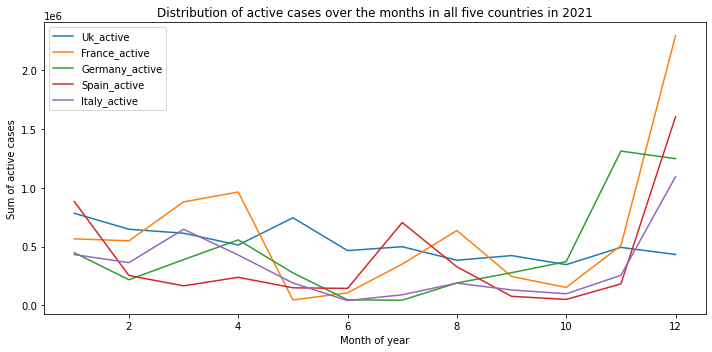

In [64]:
plt.figure()
UK_active.plot()
France_active.plot()
Germany_active.plot()
Spain_active.plot()
Italy_active.plot()
plt.title('Distribution of active cases over the months in all five countries in 2021')
plt.ylabel('Sum of active cases')
plt.xlabel('Month of year')
plt.legend()
plt.show()

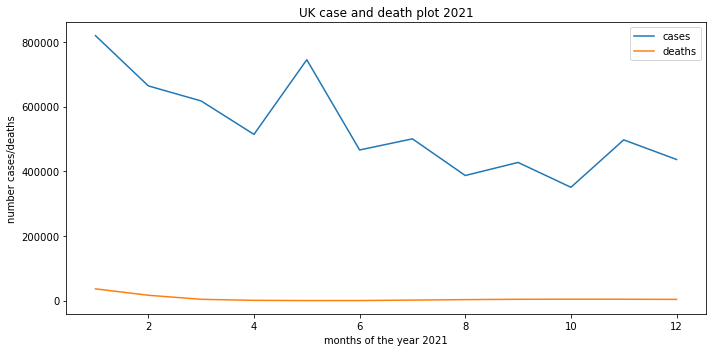

In [93]:
"""UK cases to deaths plot"""
plt.figure()
UK_21.groupby([UK_21['month']])['cases'].sum().plot()
UK_21.groupby([UK_21['month']])['deaths'].sum().plot()
plt.legend()
plt.title('UK case and death plot 2021')
plt.ylabel('number cases/deaths')
plt.xlabel('months of the year 2021')
plt.show()